In [1]:
#Gaussian Process Model packages in R were either impossible to use (documentation or time)
#Kim suggested python would give us more flexbility to try new stuff quickly

#nice tutorial on pandas
#learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

#Load my packages
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
import scipy.stats as stats

#Load data
metadata = feather.read_dataframe('../out/GaussianProcessModeling/Example_Metadata_n2000.feather')
features = feather.read_dataframe('../out/GaussianProcessModeling/Example_Features_n2000.feather')
#feature data already organized by DADA_id, but the index column is missing so need to keep 
#that in mind when importing the larger dataset (changed in R so that index is DADA_id)

features.set_index('DADA_id', inplace=True)
metadata.set_index('DADA_id', inplace=True)
metadata.head()

,sname,age.years
DADA_id,,
11406-AACAGGTCTCTG-394,VEB,8.161533
11406-AACAGTAAACAA-394,LOB,11.950719
11406-AACATTGCAGGT-394,HUD,1.774127
11406-AACCCTAACTGG-394,MON,10.094456
11406-AACCGATGTACC-394,MBE,8.287474


Text(0.5, 1.0, 'Train 1600x9575 on Test 400x9575, Kernel Scale=1, BoundMax=100')

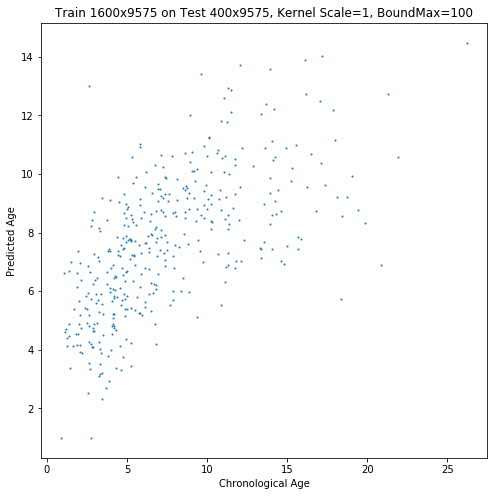

In [3]:
#Training set = 80% of samples, test is last 20%
n_samples=2000
n_features=9575

features_subset=features.iloc[:,0:n_features]
#features_subset.shape

training_cutoff = np.round(n_samples*0.8).astype(int) # take rows 1...800 (the first 80%) as a training set
                                              # rows 801...1000 will be the test set
    
X_train = features_subset.iloc[0:(training_cutoff),]
Y_train = metadata.iloc[0:(training_cutoff),1]

X_test = features_subset.iloc[(training_cutoff):n_samples,]
Y_test = metadata.iloc[(training_cutoff):n_samples,1]

# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 50
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Train 1600x9575 on Test 400x9575, Kernel Scale=1, BoundMax=100')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

In [93]:
gp.score(X_test,predicted_Y)

1.0

Text(0.5, 1.0, 'Train 1600x9575 on Test 400x9575, Kernel Scale=10, BoundMax=100')

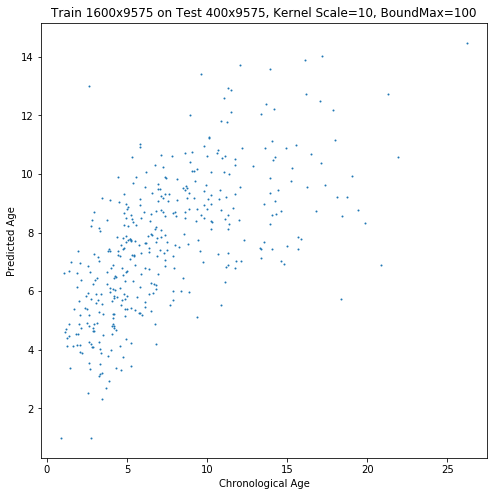

In [48]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 10
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Train 1600x9575 on Test 400x9575, Kernel Scale=10, BoundMax=100')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

Text(0.5, 1.0, 'Train 1600x9575 on Test 400x9575, Kernel Scale=100, BoundMax=1000')

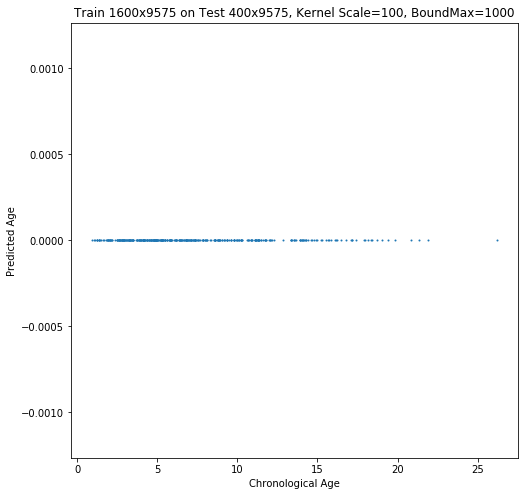

In [4]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 100
l_bounds = 1, 1000
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Train 1600x9575 on Test 400x9575, Kernel Scale=100, BoundMax=1000')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

Text(0.5, 1.0, 'Train 1600x9575 on Test 400x9575, Kernel Scale=30, BoundMax=100')

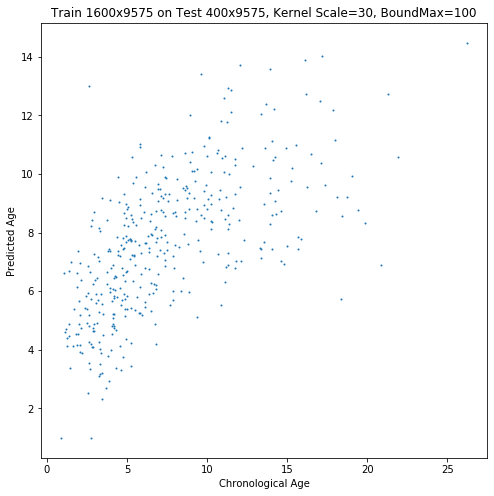

In [49]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 30
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Train 1600x9575 on Test 400x9575, Kernel Scale=30, BoundMax=100')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

In [82]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 50
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Train 1600x9575 on Test 400x9575, Kernel Scale=50, BoundMax=100')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

KeyboardInterrupt: 

In [45]:
metadata_full = feather.read_dataframe('../out/GaussianProcessModeling/metadata_filtered_8020_arranged.feather')
features_full = feather.read_dataframe('../out/GaussianProcessModeling/Features_arranged.feather')
#feature data already organized by DADA_id, but the index column is missing so need to keep 
#that in mind when importing the larger dataset (changed in R so that index is DADA_id)

features_full.set_index('DADA_id', inplace=True)

metadata_full.set_index('DADA_id', inplace=True)
metadata_full.head()

,sname,age.years,sex,testID
DADA_id,,,,
11406-AACAGGTCTCTG-394,VEB,8.161533,M,1
11406-AACAGTAAACAA-394,LOB,11.950719,M,4
11406-AACATTGCAGGT-394,HUD,1.774127,M,4
11406-AACCCTAACTGG-394,MON,10.094456,F,2
11406-AACCGATGTACC-394,MBE,8.287474,F,3


Slope 0.7604929204297842
Intercept 0.9171126172667581
p-value 7.953116962167429e-223
R-squared 0.3141732798971589
Pearson's R, p-value (0.5605116233381421, 7.95311696213614e-223)


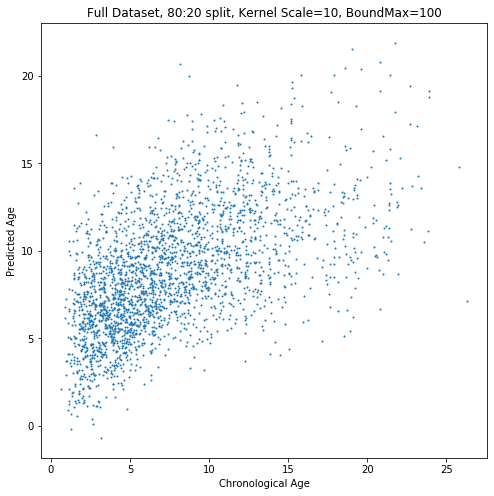

In [8]:
#Training set = 80% of samples, test is last 20%
n_samples=13476
n_features=9575

features_subset=features_full.iloc[:,0:n_features]
#features_subset.shape

training_cutoff = np.round(n_samples*0.8).astype(int) # take rows 1...800 (the first 80%) as a training set
                                              # rows 801...1000 will be the test set
    
X_train = features_subset.iloc[0:(training_cutoff),]
Y_train = metadata.iloc[0:(training_cutoff),1]

X_test = features_subset.iloc[training_cutoff:n_samples,]
Y_test = metadata.iloc[training_cutoff:n_samples,1]

# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 10
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K10 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K10, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=10, BoundMax=100')
#plt.savefig('../out/GaussianProcessModeling/Plot_GP_Train1600x9575.png')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K10,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K10,Y_test))

Slope 0.7604929209395961
Intercept 0.9171126128861466
p-value 7.953110297914062e-223
R-squared 0.31417328032361186
Pearson's R, p-value (0.5605116237185557, 7.953110297893424e-223)


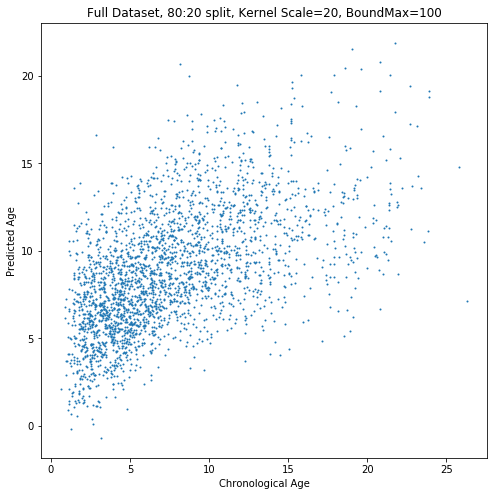

In [9]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 20
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K20 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K20, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=20, BoundMax=100')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K20,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K20,Y_test))

Slope 0.7604929204284613
Intercept 0.9171126172780859
p-value 7.953116979541431e-223
R-squared 0.314173279896047
Pearson's R, p-value (0.56051162333715, 7.95311697951509e-223)


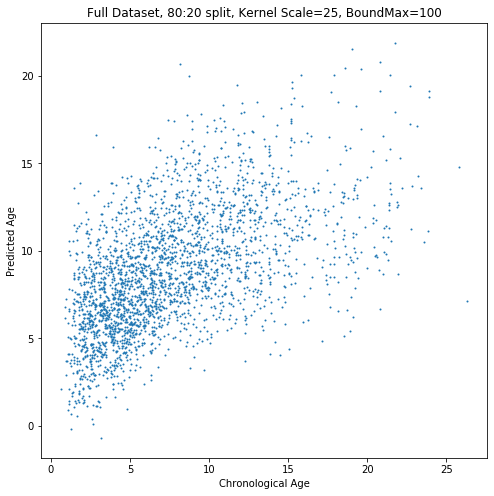

In [10]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 25
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K25 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K25, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=25, BoundMax=100')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K25,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K25,Y_test))

Slope 0.7604929521857885
Intercept 0.917112344425056
p-value 7.952701955863692e-223
R-squared 0.31417330645456265
Pearson's R, p-value (0.5605116470284652, 7.952701955840932e-223)


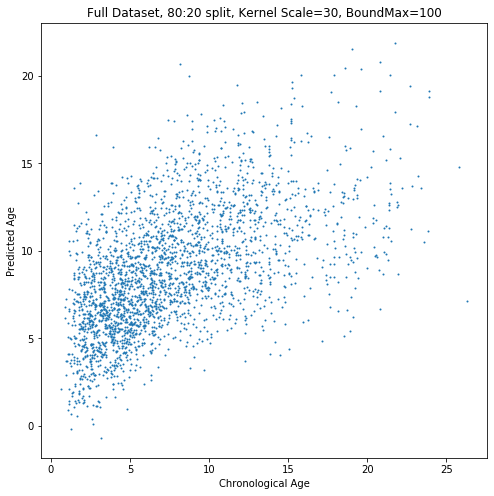

In [11]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 30
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K30 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K30, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=30, BoundMax=100')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K30,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K30,Y_test))

Slope 0.760492914672445
Intercept 0.9171126667333311
p-value 7.953192204267402e-223
R-squared 0.31417327508235643
Pearson's R, p-value (0.5605116190431351, 7.95319220424077e-223)


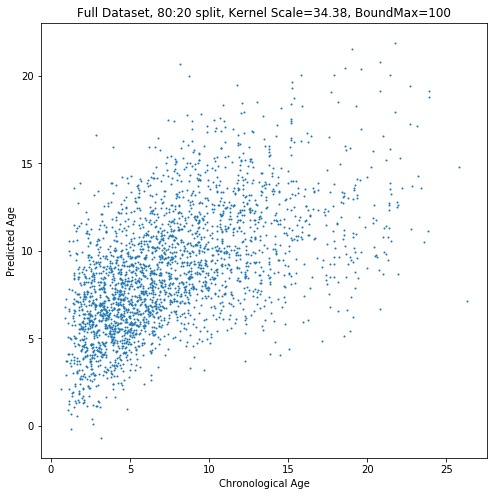

In [12]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 34.38
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K34 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K34, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=34.38, BoundMax=100')

df=pd.DataFrame(Y_test)
df['predicted']=predicted_Y
df.reset_index('DADA_id',inplace=True)
feather.write_dataframe(df, '../out/GaussianProcessModeling/Test_output.feather')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K34,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K34,Y_test))

Slope 0.7604929242835824
Intercept 0.9171125841552064
p-value 7.953066596943375e-223
R-squared 0.3141732831200953
Pearson's R, p-value (0.560511626213137, 7.953066596916675e-223)


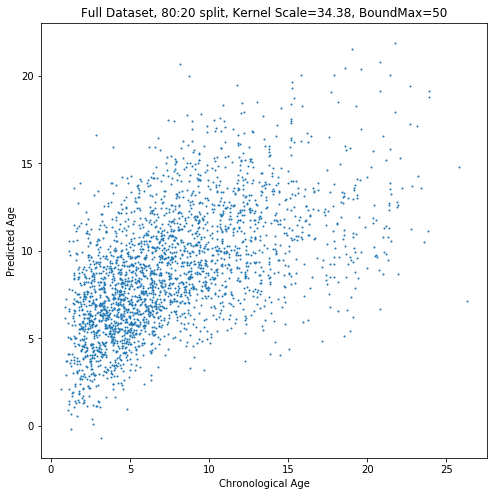

In [16]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 34.38
l_bounds = 1, 50
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K34 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K34, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=34.38, BoundMax=50')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K34,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K34,Y_test))

Slope 0.7604929832507802
Intercept 0.9171120775203239
p-value 7.952295996562159e-223
R-squared 0.31417333243436396
Pearson's R, p-value (0.5605116702035415, 7.952295996540922e-223)


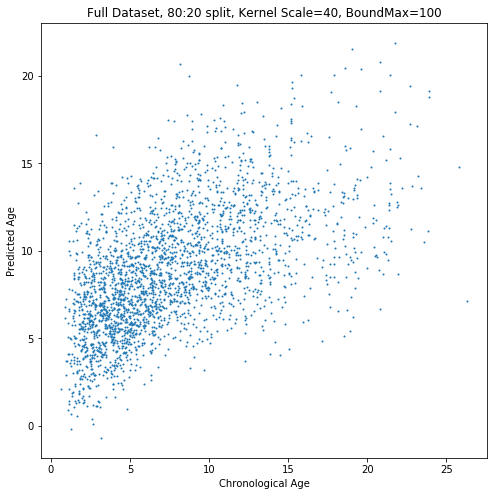

In [13]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 40
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K40 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K40, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=40, BoundMax=100')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K40,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K40,Y_test))

Slope 0.7604929246977454
Intercept 0.9171125805969149
p-value 7.953061184120631e-223
R-squared 0.3141732834664701
Pearson's R, p-value (0.5605116265221178, 7.953061184096572e-223)


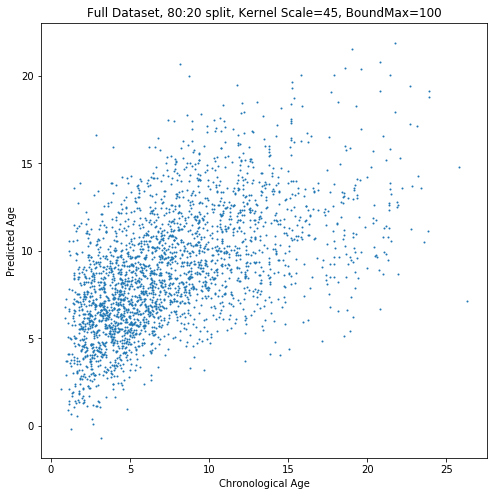

In [14]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 45
l_bounds = 1, 100
kernel = RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K45 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K45, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=45, BoundMax=100')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K45,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K45,Y_test))

Slope 1.136797488025828
Intercept -1.318639789406408
p-value 1.7728693381985024e-53
R-squared 0.4490938822183132
Pearson's R, p-value (0.6701446726030976, 1.7728693381986732e-53)


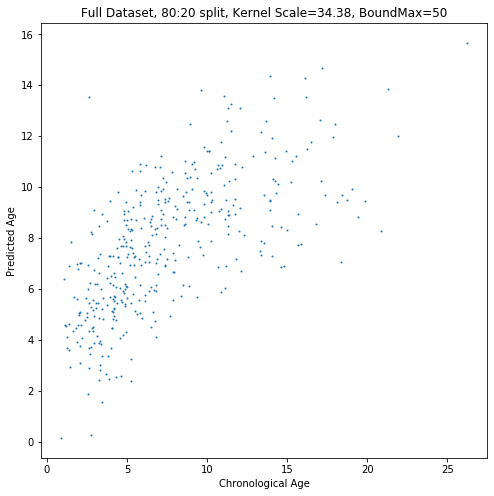

In [8]:
# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 34.38
l_bounds = 1, 50
kernel = np.var(Y_train)*RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K34 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K34, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=34.38, BoundMax=50')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K34,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K34,Y_test))

In [7]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import time
import feather
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from scipy import stats
from scipy.stats import pearsonr
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import GPy

#Load data
metadata = feather.read_dataframe('../out/GaussianProcessModeling/Example_Metadata_n2000.feather')
features = feather.read_dataframe('../out/GaussianProcessModeling/Example_Features_n2000.feather')
#feature data already organized by DADA_id, but the index column is missing so need to keep 
#that in mind when importing the larger dataset (changed in R so that index is DADA_id)

features.set_index('DADA_id', inplace=True)

ages=metadata['age.years']

n_samples=2000
n_features=9575

features_subset=features.iloc[:,:n_features]
# looks like there are redundant features? we can kill these
# features_subset=pd.DataFrame(np.unique(features_subset, axis=1))
# standardize the predictors (not obvious this affects performance)
features_subset=pd.DataFrame(stats.zscore(features_subset, axis=1))

training_cutoff = np.round(n_samples*0.8).astype(int) # take rows 1...800 (the first 80%) as a training set
                                                      # rows 801...1000 will be the test set
    
X_train = features_subset.iloc[0:(training_cutoff),]
Y_train = ages[0:(training_cutoff)]

X_test = features_subset.iloc[training_cutoff:n_samples,]
Y_test = ages[training_cutoff:n_samples]

# optimize all params (yikes?)
m1 = GPy.models.GPHeteroscedasticRegression(X_train,Y_train[:,None])
m1.optimize()

mu, var = m1._raw_predict(X_test.values)

plt.figure(figsize=(8, 8))
plt.scatter(Y_test, mu, s=2)
plt.savefig('../out/GaussianProcessModeling/out/plot_GPyfit_heteroscedastic.png')

# define the (squared exponential == "radial basis" == Gaussian) kernel; these are vanilla settings
l_scale = 34.38
l_bounds = 1, 50
kernel = np.var(Y_train)*RBF(length_scale=l_scale, length_scale_bounds=l_bounds)

# instantiate the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel)
# fit it with the training data
fit = gp.fit(X_train, Y_train)
# make predictions on the test input
predicted_Y_K34 = fit.predict(X_test)

# plot our true test Y's to our predicted Y's
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, predicted_Y_K34, s=1)
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.ylabel('Predicted Age')
plt.xlabel('Chronological Age')
plt.title('Full Dataset, 80:20 split, Kernel Scale=34.38, BoundMax=50')

plt.savefig('../out/GaussianProcessModeling/out/plot_OriginalGPfit_heteroscedastic.png')

gradient, intercept, r_value, p_value, std_err =stats.linregress(predicted_Y_K34,Y_test)
print("Slope",gradient)
print("Intercept",intercept)
print("p-value",p_value)
print("R-squared",r_value**2)
print("Pearson's R, p-value",stats.pearsonr(predicted_Y_K34,Y_test))


Slope 1.0385127601854875
Intercept -0.6404651819559017
p-value 1.6818998872720474e-56
R-squared 0.46797539630874424
Pearson's R, p-value (0.684087272435867, 1.6818998872720284e-56)
